In [47]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

# EDA Current Data

In [48]:
df = pd.read_excel("Intelligent Meter - Inventory Management System Dataset.xlsx",sheet_name="Meter Info")
df.head(10)

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Model,Meter Installation Date,Meter Age,Meter Mileage,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 15mm,2017-12-18,6.526027,41417,NaN,Data Dictionary,NaN
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 20mm,2022-04-29,1.849315,91040,NaN,Region:,Region where the meter being installed
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2023-03-14,0.975342,20505,NaN,Serial Number:,Unique meter serial number
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,LXH 15B 15mm,2017-12-13,10.531507,5508,NaN,Meter Size:,Size of the meter in mm
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2022-08-12,1.561644,10156,NaN,Meter Type:,Type of the meter
5,Petaling,AIS17DA00XXXXX,25,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 25mm,2017-12-20,6.556164,5015,NaN,Meter Manufacturer:,Manufacturer of the meter
6,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 20mm,2022-02-15,2.049315,19635,NaN,Meter Model:,Model of the meter
7,Kuala Lumpur,PUAS041015XXXXX,150,Mechanical Meter - Ductile Iron Body & Woltman...,George Kent Malaysia,"HELIX METER 6"" METER",2017-12-15,18.786301,89084,NaN,Meter Installation Date:,Install date of the meter at the customer's pr...
8,Gombak,AIS17PA03XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,KSM Volumetric 15mm,2018-04-10,5.904110,18333,NaN,Meter Age:,Age of the meter
9,Hulu Langat,AIS23PD03XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2024-02-24,0.024658,30714,NaN,Meter Mileage:,Mileage of the meter


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Region                   200 non-null    object        
 1   Serial Number            200 non-null    object        
 2   Meter Size               200 non-null    int64         
 3   Meter Type               200 non-null    object        
 4   Meter Manufacturer       200 non-null    object        
 5   Meter Model              200 non-null    object        
 6   Meter Installation Date  200 non-null    datetime64[ns]
 7   Meter Age                200 non-null    float64       
 8   Meter Mileage            200 non-null    int64         
 9   Unnamed: 9               0 non-null      float64       
 10  Unnamed: 10              10 non-null     object        
 11  Unnamed: 11              9 non-null      object        
dtypes: datetime64[ns](1), float64(2), in

In [50]:
#
df.drop(columns=['Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis = 0, inplace = True)
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Model,Meter Installation Date,Meter Age,Meter Mileage
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 15mm,2017-12-18,6.526027,41417
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 20mm,2022-04-29,1.849315,91040
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2023-03-14,0.975342,20505
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,LXH 15B 15mm,2017-12-13,10.531507,5508
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2022-08-12,1.561644,10156
...,...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,LXHG-15/S,2021-12-02,2.254795,34293
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2022-07-28,1.602740,16779
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,DPM-15P 15mm,2017-12-16,8.372603,16076
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,KSM Volumetric 15mm,2019-03-18,4.967123,7016


In [51]:
df['Meter Manufacturer'].value_counts()

Meter Manufacturer
George Kent Malaysia         104
Aqua Flo Sdn. Bhd.            42
Ningbo Water Meter            26
VSD Automation Sdn. Bhd.      13
Delta Perdana Sdn Bhd          6
Sensus                         4
KAMSTRUP                       3
ABB                            1
Progressive Crest Sdn Bhd      1
Name: count, dtype: int64

In [52]:
len(df['Meter Model'].value_counts())

32

In [53]:
df[df['Meter Manufacturer']=='Delta Perdana Sdn Bhd'][['Meter Model','Meter Size']].value_counts()

Meter Model   Meter Size
DPM-15P 15mm  15            6
Name: count, dtype: int64

In practical use to put each meter model is not doable unless you have a lot of data on every each meter model. Thus we can drop the meter model column

In [54]:
drop_col = 'Meter Model'
df.drop(columns=drop_col,axis=1,inplace=True)
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Age,Meter Mileage
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2017-12-18,6.526027,41417
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2022-04-29,1.849315,91040
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2023-03-14,0.975342,20505
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-13,10.531507,5508
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-08-12,1.561644,10156
...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2021-12-02,2.254795,34293
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-07-28,1.602740,16779
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,2017-12-16,8.372603,16076
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2019-03-18,4.967123,7016


<Axes: ylabel='Frequency'>

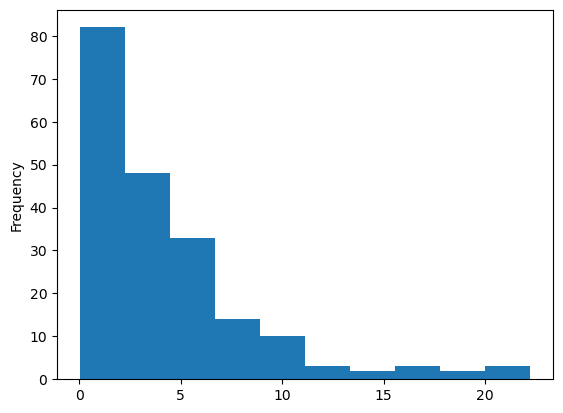

In [55]:
df['Meter Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

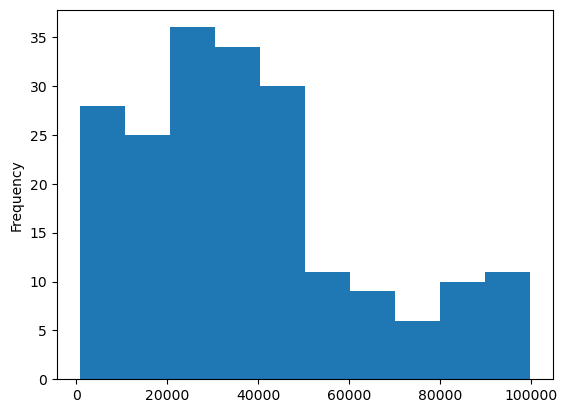

In [56]:
df['Meter Mileage'].plot(kind='hist')

In [57]:
today = date.today()
df['Today Date'] = today
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Age,Meter Mileage,Today Date
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2017-12-18,6.526027,41417,2024-04-23
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2022-04-29,1.849315,91040,2024-04-23
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2023-03-14,0.975342,20505,2024-04-23
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-13,10.531507,5508,2024-04-23
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-08-12,1.561644,10156,2024-04-23
...,...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2021-12-02,2.254795,34293,2024-04-23
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-07-28,1.602740,16779,2024-04-23
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,2017-12-16,8.372603,16076,2024-04-23
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2019-03-18,4.967123,7016,2024-04-23


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Region                   200 non-null    object        
 1   Serial Number            200 non-null    object        
 2   Meter Size               200 non-null    int64         
 3   Meter Type               200 non-null    object        
 4   Meter Manufacturer       200 non-null    object        
 5   Meter Installation Date  200 non-null    datetime64[ns]
 6   Meter Age                200 non-null    float64       
 7   Meter Mileage            200 non-null    int64         
 8   Today Date               200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 14.2+ KB


In [59]:
df['Today Date'] = pd.to_datetime(df['Today Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Region                   200 non-null    object        
 1   Serial Number            200 non-null    object        
 2   Meter Size               200 non-null    int64         
 3   Meter Type               200 non-null    object        
 4   Meter Manufacturer       200 non-null    object        
 5   Meter Installation Date  200 non-null    datetime64[ns]
 6   Meter Age                200 non-null    float64       
 7   Meter Mileage            200 non-null    int64         
 8   Today Date               200 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [60]:
df['Installed Period'] = (df['Today Date'] - df['Meter Installation Date'])/np.timedelta64(1,'Y')
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Age,Meter Mileage,Today Date,Installed Period
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2017-12-18,6.526027,41417,2024-04-23,6.350685
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2022-04-29,1.849315,91040,2024-04-23,1.986301
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2023-03-14,0.975342,20505,2024-04-23,1.112329
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-13,10.531507,5508,2024-04-23,6.364384
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-08-12,1.561644,10156,2024-04-23,1.698630
...,...,...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2021-12-02,2.254795,34293,2024-04-23,2.391781
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-07-28,1.602740,16779,2024-04-23,1.739726
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,2017-12-16,8.372603,16076,2024-04-23,6.356164
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2019-03-18,4.967123,7016,2024-04-23,5.104110


In [61]:
df.sort_values(by='Installed Period',ascending=False)

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Age,Meter Mileage,Today Date,Installed Period
64,Kuala Selangor,SYA15E00XXXXX,40,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-01,7.679452,49369,2024-04-23,6.397260
79,Kuala Lumpur,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-01,9.679452,39399,2024-04-23,6.397260
148,Kuala Langat,AIS17PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2017-12-01,6.884932,23596,2024-04-23,6.397260
38,Sabak Bernam,SYA14J00XXXXX,150,Mechanical Meter - Cast Iron Body & Woltmann T...,Ningbo Water Meter,2017-12-02,8.775342,75114,2024-04-23,6.394521
51,Hulu Selangor,SYA13H00XXXXX,100,Mechanical Meter - Cast Iron Body & Woltmann T...,Ningbo Water Meter,2017-12-02,9.317808,96640,2024-04-23,6.394521
...,...,...,...,...,...,...,...,...,...,...
80,Petaling,AIS23CE00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,VSD Automation Sdn. Bhd.,2024-01-04,0.164384,4458,2024-04-23,0.301370
185,Gombak,AIS23DD00XXXXX,25,Mechanical Meter - Brass Body & Piston Volumet...,Aqua Flo Sdn. Bhd.,2024-01-23,0.112329,36096,2024-04-23,0.249315
45,Petaling,AIS23PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2024-01-29,0.095890,26784,2024-04-23,0.232877
181,Gombak,AIS22ED00XXXXX,40,Mechanical Meter - Brass Body & Piston Volumet...,Aqua Flo Sdn. Bhd.,2024-02-08,0.068493,92665,2024-04-23,0.205479


The Installed period are not the same as the Meter Age. It does not collide the same data. As we dont know how their calculations we will use my own calcalation for this time.

In [63]:
drop_col = ['Today Date','Meter Age']
df.drop(columns=drop_col,axis=1,inplace=True)
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Mileage,Installed Period
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2017-12-18,41417,6.350685
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2022-04-29,91040,1.986301
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2023-03-14,20505,1.112329
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-13,5508,6.364384
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-08-12,10156,1.698630
...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2021-12-02,34293,2.391781
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-07-28,16779,1.739726
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,2017-12-16,16076,6.356164
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2019-03-18,7016,5.104110


In [74]:
df['Region'].value_counts()

Region
Petaling          46
Klang             41
Gombak            28
Kuala Lumpur      28
Hulu Langat       15
Hulu Selangor     11
Sepang            11
Kuala Selangor     9
Kuala Langat       8
Sabak Bernam       3
Name: count, dtype: int64

# Data Mockup

In [65]:
df_ref = pd.read_csv("NPDC_Infrastructure_3A_Water_Supply_-_Meter.csv")
df_ref.head()

,X,Y,OBJECTID,ASSETID,SearchDescription,Type,SerialNo,ExpectedCommissioning,AssetStage,MaintenanceResp,...,DrawingRef,SpatialAccuracy,MeterComponent,PropertyUse,NumDials,AccountNo,MeterSize,loaddate,InstallDate,FunctionService
0,1.703673e+06,5.678931e+06,1,40110871.0,RU-MOUNT0123WM,Unknown,NM768,NaN,In Service,Unknown,...,NaN,DIGITISE,REG,Farm Land,45.0,560.0,0.0,2024/03/22 22:03:57+00,1992/08/31 00:00:00+00,Water\New Plymouth System\New Plymouth Reticul...
1,1.699830e+06,5.677750e+06,2,40110877.0,BB-PARAI0126WM,Unknown,104622,NaN,In Service,Unknown,...,NaN,DIGITISE,REG,Small Holdings,37.0,1170.0,0.0,2024/03/22 22:03:57+00,1994/01/13 00:00:00+00,Water\New Plymouth System\New Plymouth Reticul...
2,1.708751e+06,5.681611e+06,3,40110879.0,WA-PRINC0127WM,Restricted Flow Meter,RFHAMEL,NaN,In Service,Water,...,NaN,DIGITISE,REG,FARMLET,30.0,1222.0,1.0,2024/03/22 22:03:57+00,1994/03/21 00:00:00+00,Water\New Plymouth System\New Plymouth Reticul...
3,1.704763e+06,5.677466e+06,4,40110881.0,RU-RICH10357WM/1,Manifold Meter,MN353,NaN,In Service,Water,...,SERVICES 128 KELLY ROAD,DIGITISE,REG,Farm Land,45.0,1484.0,20.0,2024/03/22 22:03:57+00,1998/06/12 00:00:00+00,Water\New Plymouth System\New Plymouth Reticul...
4,1.702867e+06,5.665182e+06,5,40110882.0,IN-RATA0129WM,Unknown,MN145,NaN,In Service,Unknown,...,NaN,DIGITISE,REG,Residential,82.0,829.0,0.0,2024/03/22 22:03:57+00,1992/08/31 00:00:00+00,Water\Inglewood System\Inglewood Reticulation\...


In [73]:
for i in df_ref['PropertyUse'].unique():
    print(i)

Farm Land
Small Holdings
FARMLET
Residential
FARM
RESTRICTED
Commercial/Industrial
Water Billing Account
HORTICULTU
INDUSTRIAL
nan
COMMERCIAL
EDUCATION
COUNCIL LA
FLOW METER
DOMESTIC
CLUBS & SO
HOSPITALS/
COMMERCIAL/INDUSTRIAL
DETECTOR C
CHURCHES/W
BYPASS FLO
CHURCH
LIFESTYLE
NON RATEAB
NOT READ
OMATA SCHO
BYPASS
RAW WATER
SCHOOL
RESTRICTTE
OFF RAW WA
PARKS
FIRE LINE
COUNCIL
GOVT DEPTS
NPDC FLOW
RESTRICTOR
WATER FILL
PRIVATE
RETRICTED
FIREMAIN B
COUNCIL BU
HOSPITAL
RESRTICTED
EDUCTAION
RF
CLUBS AND
RISTRICTED
RESIDENTIA
Domestic
COUNCIL LAND/PRPTY
EDUCATION PROPERTIES
CLUBS & SOCS
RESIDENTAL
RESIDENTIAL
WATERING
DOEMSTIC
RESTRICTED FLOW
TOILETS
FARMLAND
UNKNOWN
DOMESTI
HOLIDAY
FIELD
RURAL
DOMES
RELIGIOUS
PADDOCK
PUBLIC TOILETS
KINDERGARTEN
SMALL HOLDINGS
FARM FEEDS HOUSE
CHECK METER ON FIRELINE
WAC20/00089
COMMERCIAL/NON-CHARGABLE
FARM LAND
PLAYGROUND/DOMESTIC
MOTOR HOME WASTEWATER DUMP STATION
FARM SUPPLY
PLANE CLUB SUPPLY
TEST LINE RESV 1 WTP
SMALL HOLDING
LIFESTYLE BLOCK
SMALLHOLDIN

I decide to use a few from here such as

1. Domestic_Land (Bungalow/Terrace/Semi-D and etc)
2. Domestic_Highrise
3. Farm
4. Commercial
5. Factory
6. Religious (Mosque/Church/Temple)
7. Government
8. Hospitals
9. Education_Institute
10. Public_Restroom (Parks/ RnR)

https://hydrohub.airselangor.com/publication/air-selangor-commits-to-deliver-best-customer-experience-through-sustainable-waters-supply/


Air Selangor is responsible for supplying water to 2,262,706 household accounts, 321,016 non-residential accounts, and 5,271 special accounts (religious and charitable institutions) takes up the responsibility on supplying clean and safe treated water to all consumers.

In [77]:
#Water Meter in Selangor based on property use
domestic_landed =  858117 #https://napic2.jpph.gov.my/storage/app/media//0-utama/document/snapshot/2023/Snapshot%20H1%202023.pdf
domestic_highrise = 103545 #https://napic2.jpph.gov.my/storage/app/media//0-utama/document/snapshot/2023/Snapshot%20H1%202023.pdf

#from the statement of Air Selangor statement from 2022 we use the ratio of founded data and multiply to the numbers
total_house_source = domestic_highrise+domestic_landed
land_ratio = domestic_landed/(total_house_source)
highrise_ratio = domestic_highrise/(total_house_source)

total_house_AS = 22662706

demostic_landed_AS = int(land_ratio*total_house_AS)
demostic_highrise_AS = int(highrise_ratio*total_house_AS)

print("domestic landed: ",demostic_landed_AS)
print("domestic highrise: ",demostic_highrise_AS)

domestic landed:  20222545
domestic highrise:  2440160


In [ ]:
#from JAIS https://e-masjid.jais.gov.my/dashboard/listsurau & https://e-masjid.jais.gov.my/dashboard/listmasjid
surau_petaling = 412
surau_gombak = 233
surau_klang = 225
surau_kualalangat = 137
surau_